## (2018/08更新) WMLのDLモデルのデモ用にMNISTデータをJSONで作成する
Pls see https://stackoverflow.com/questions/49526227/deep-learning-how-can-i-test-the-mnist-tutorial-model-on-wml for details

In [2]:
import json
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

C:\ProgramData\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# MNIST のN番目のデータを指定

In [3]:
N = 1  # specify the number

# 念のためイメージを表示する

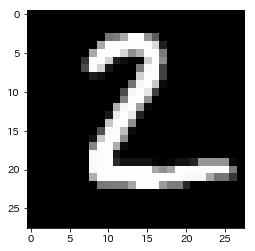

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
img = X_test[N]
img = np.array(img, dtype='float')
pixels = img.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# イメージをJSON formatに変換する
#### ①json.dumpで書き出されるファイル　または　②print分で表示されるjson　をWML UIの"TEST"タブの "Enter input data" フィールドにコピペ

In [6]:
score_payload_data = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
#### 2018/08 MNISTサンプルが/255の正規化を行わなくなったので、削除
####score_payload_data = score_payload_data.astype("float32")/255
score_payload_data = score_payload_data.astype("float32")
score_payload_data = score_payload_data[N].tolist() ## Here we are choosing the Nth image in the list to predict
scoring_payload = {"values": [score_payload_data]}

# save to file
with open('wml-input.json', 'w') as f:
    json.dump(scoring_payload,f)
# or print it directly    which ever will work.
print(json.dumps(scoring_payload))    

{"values": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [116.0], [125.0], [171.0], [255.0], [255.0], [150.0], [93.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [169.0], [253.0], [253.0], [253.0], [253.0], [253.0], [253.0], [218.0], [30.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.

# UIではなくAPIで WML Scoring サービスを起動する場合
######  "Implementation" tab の"Code Snippets" をコピペしてください。"credentials" や "requests.post" URL は各人で異なります

In [7]:
#-------------コピペ開始
import urllib3, requests, json

# retrieve your wml_service_credentials_username, wml_service_credentials_password, and wml_service_credentials_url from the
# Service credentials associated with your IBM Cloud Watson Machine Learning Service instance

wml_credentials={
"url": "https://ibm-watson-ml.mybluemix.net",
"username": "b5eb6ab8-6a0d-4b35-9db2-7a0b682f968b",
"password": "88afb999-51ea-4253-a27e-8e68abb5fef7"
}

headers = urllib3.util.make_headers(basic_auth='{username}:{password}'.format(username=wml_credentials['username'], password=wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
#payload_scoring = {"fields": [array_of_feature_columns], "values": [array_of_values_to_be_scored, another_array_of_values_to_be_scored]}
payload_scoring = scoring_payload
response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/v3/wml_instances/66d16781-fb49-4dd3-a485-9fd0a4285f9f/deployments/f901723a-afe7-4939-b648-637310893fe2/online', json=payload_scoring, headers=header)
print("Scoring response")
print(json.loads(response_scoring.text))

#-------------コピペ終了
dic1 = json.loads(response_scoring.text)
list1 = dic1.get('values')[0]

Scoring response
{'fields': ['prediction'], 'values': [[2.3701739237935726e-08, 2.054115633143283e-08, 0.9999855756759644, 1.8980050170425145e-11, 6.419850748554633e-15, 1.2609378602021493e-12, 1.436584807379404e-05, 2.949664852998768e-17, 2.7069216201880408e-08, 1.0510992778738591e-14]]}


# 判定結果のプリント( 結果と確信度 )

In [8]:
print("number              confidence")
["{0}      ==>  {1}".format(i , v) for i, v in enumerate(list1)]

number              confidence


['0      ==>  2.3701739237935726e-08',
 '1      ==>  2.054115633143283e-08',
 '2      ==>  0.9999855756759644',
 '3      ==>  1.8980050170425145e-11',
 '4      ==>  6.419850748554633e-15',
 '5      ==>  1.2609378602021493e-12',
 '6      ==>  1.436584807379404e-05',
 '7      ==>  2.949664852998768e-17',
 '8      ==>  2.7069216201880408e-08',
 '9      ==>  1.0510992778738591e-14']

In [9]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd(f"# Watson says: the image is {list1.index(max(list1))}.      confidence:({max(list1)})") # from Python 3.6 - f"xxx{hoge}"

# Watson says: the image is 2.      confidence:(0.9999855756759644)